In [ ]:
import pandas as pd

# read data
reviews_df = pd.read_csv("G:\My Drive\Sem 2\Advance Text Analytics\Hotel_Reviews.csv")
# concate negative and positive reviews
reviews_df["review"] = reviews_df["Negative_Review"] + reviews_df["Positive_Review"]
# create label based on reviwer score
reviews_df["is_bad_review"] = reviews_df["Reviewer_Score"].apply(lambda x: 1 if x < 5 else 0)
# select only relevant columns
#reviews_df = reviews_df[["review", "is_bad_review"]]
reviews_df.head()

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,review,is_bad_review
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,I am so angry that i made this post available...,1
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,No Negative No real complaints the hotel was g...,0
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,Rooms are nice but for elderly a bit difficul...,0
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968,My room was dirty and I was afraid to walk ba...,1
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968,You When I booked with your company on line y...,0


In [ ]:
#Sampling data, given data is too huge and take alot of time to compute. Hence the necessary step
reviews_df = reviews_df.sample(frac = 0.1, replace = False, random_state=42)
reviews_df_export = reviews_df.copy()

In [ ]:
# remove 'No Negative' or 'No Positive' from review line item
reviews_df["review"] = reviews_df["review"].apply(lambda x: x.replace("No Negative", "").replace("No Positive", ""))
reviews_df_export["review"] = reviews_df_export["review"].apply(lambda x: x.replace("No Negative", "").replace("No Positive", ""))

In [ ]:
#function for data pre processing
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer

def data_preprocess(review_line_item):
    # lowercase the review_line item
    review_line_item = review_line_item.lower()
    
    # tokenize & remove puncutation
    review_line_item = [word.strip(string.punctuation) for word in review_line_item.split(" ")]
    
    # remove words that contain numbers
    review_line_item = [word for word in review_line_item if not any(c.isdigit() for c in word)]
    number_words=review_line_item
    
    # remove stop words
    stop = stopwords.words('english')
    review_line_item = [x for x in review_line_item if x not in stop]
    stop_words= review_line_item
    
    # remove empty tokens
    review_line_item = [t for t in review_line_item if len(t) > 0]
    empty_token=review_line_item
    
    # pos tagging
    pos_tags = pos_tag(review_line_item)
    pos_tagging = review_line_item
    
    # lemmatize
    review_line_item = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    lem=review_line_item
    
    # remove words with only one letter    
    review_line_item = [t for t in review_line_item if len(t) > 1]
    single_letter=review_line_item
    
    # join all
    review_line_item = " ".join(review_line_item)
    
    return(review_line_item,number_words,stop_words,empty_token,pos_tagging,lem,single_letter)

#call data preprocessing function

reviews_df_export["review_clean"],reviews_df_export["number_words"],reviews_df_export["stop_words"],reviews_df_export["empty_token"],reviews_df_export["pos_tagging"],reviews_df_export["lem"],reviews_df_export["single_letter"]=zip(*reviews_df_export["review"].apply(lambda x: data_preprocess(x)))

reviews_df["review_clean"] = reviews_df_export["review_clean"]
#print(reviews_df.head())

C:\Users\Sahil\anaconda3\lib\site-packages\pandas\core\common.py:208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = np.asarray(values, dtype=dtype)


In [ ]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment_intensity = SentimentIntensityAnalyzer()
reviews_df["sentiments"] = reviews_df["review"].apply(lambda x: sentiment_intensity.polarity_scores(x))
reviews_df = pd.concat([reviews_df.drop(['sentiments'], axis=1), reviews_df['sentiments'].apply(pd.Series)], axis=1)
print(reviews_df.head())

                                            Hotel_Address  \
488440                 Via Senigallia 6 20161 Milan Italy   
274649  Arlandaweg 10 Westpoort 1043 EW Amsterdam Neth...   
374688        Mallorca 251 Eixample 08008 Barcelona Spain   
404352  Piazza Della Repubblica 17 Central Station 201...   
451596  Singel 303 309 Amsterdam City Center 1012 WJ A...   

        Additional_Number_of_Scoring Review_Date  Average_Score  \
488440                           904   7/21/2017            8.1   
274649                           612  12/12/2016            8.6   
374688                            46  11/26/2015            8.3   
404352                           241  10/17/2015            9.1   
451596                           834   5/16/2016            9.1   

                                        Hotel_Name  \
488440                              Hotel Da Vinci   
274649                           Urban Lodge Hotel   
374688  Alexandra Barcelona A DoubleTree by Hilton   
404352        

In [ ]:
# concate no. of chars to dataframe
reviews_df["nb_chars"] = reviews_df["review"].apply(lambda x: len(x))

# concate no. of words to dataframe
reviews_df["nb_words"] = reviews_df["review"].apply(lambda x: len(x.split(" ")))

In [ ]:
# concate doc2vec vector to dataframe
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(reviews_df["review_clean"].apply(lambda x: x.split(" ")))]

# train Doc2Vec model with review data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform every doc to vector data
doc2vec_df = reviews_df["review_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
reviews_df = pd.concat([reviews_df, doc2vec_df], axis=1)

In [ ]:
# calculate tf-idfs and concate to review dataframe
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 10)
tfidf_output = tfidf.fit_transform(reviews_df["review_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_output, columns = tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = reviews_df.index
reviews_df = pd.concat([reviews_df, tfidf_df], axis=1)

In [ ]:
#export dataframe to csv for Power BI visualization
export_df=reviews_df[["review","is_bad_review","neg","neu","pos","compound","nb_chars","nb_words"]]

EDA_Df = pd.concat([reviews_df_export,export_df], axis=1)

EDA_Df.to_csv("G://My Drive//Sem 2//Advance Text Analytics//file1.csv")

In [ ]:
#dropping columns not required for RF model building
reviews_df.drop(["Hotel_Address","Additional_Number_of_Scoring","Review_Date","Average_Score","Hotel_Name","Reviewer_Nationality","Negative_Review","Review_Total_Negative_Word_Counts","Total_Number_of_Reviews","Positive_Review","Review_Total_Positive_Word_Counts","Total_Number_of_Reviews_Reviewer_Has_Given","Reviewer_Score",	"Tags","days_since_review","lat","lng"],axis = 1)

,review,is_bad_review,review_clean,neg,neu,pos,compound,nb_chars,nb_words,doc2vec_vector_0,...,word_yet,word_yoghurt,word_yogurt,word_young,word_yr,word_yummy,word_zero,word_ziggo,word_zone,word_zuid
488440,Would have appreciated a shop in the hotel th...,0,would appreciate shop hotel sell drinking wate...,0.049,0.617,0.334,0.9924,599,113,-0.030352,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274649,No tissue paper box was present at the roomNo...,0,tissue paper box present roomno positive,0.159,0.580,0.261,0.3400,55,11,0.077820,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
374688,Pillows Nice welcoming and service,0,pillow nice welcome service,0.000,0.345,0.655,0.6908,36,7,0.005063,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
404352,No Negative Everything including the nice upgr...,0,negative everything include nice upgrade hotel...,0.149,0.529,0.322,0.7845,166,28,-0.021126,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
451596,No Negative Lovely hotel v welcoming staff,0,negative lovely hotel welcome staff,0.404,0.137,0.459,0.2023,43,8,0.046284,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274862,Bathroom water easy made the bathroom wet whe...,0,bathroom water easy make bathroom wet bath wal...,0.000,0.614,0.386,0.8834,142,25,-0.201315,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9732,Room very small chair tatty in the room No Po...,1,room small chair tatty room positive,0.159,0.580,0.261,0.3400,52,11,0.077605,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
424201,Expensive rates and mini bar prices Roof top ...,0,expensive rate mini bar price roof top pool vi...,0.000,0.886,0.114,0.2023,80,16,-0.305991,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
72380,There was a very loud AC machine right outsid...,0,loud ac machine right outside window affect sl...,0.047,0.845,0.108,0.4767,176,36,0.191313,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# sorting and printing reviews having more than 5 words with highest positive sentiment
reviews_df[reviews_df["nb_words"] >= 5].sort_values(by="pos", ascending = False)[["review", "pos"]].head(10)

,review,pos
257146,friendly staff clean,0.855
480968,Nice quite clean,0.853
34219,Pretty happy really Amazing location,0.846
173642,Lovely breakfast friendly staffNo Positive,0.841
293418,overall I liked Lovely comfortable room,0.832
214404,Liked everything Friendly helpful staff,0.815
58778,It was beautiful Great,0.800
238763,N A Excellent accomodation Great location Gre...,0.799
158387,All was good Friendly greeting Nice room,0.793
389212,N a Lovely city,0.792


In [ ]:
#reviews_df=reviews_df.drop(["Hotel_Address","Additional_Number_of_Scoring","Review_Date","Average_Score","Hotel_Name","Reviewer_Nationality","Negative_Review","Review_Total_Negative_Word_Counts","Total_Number_of_Reviews","Positive_Review","Review_Total_Positive_Word_Counts","Total_Number_of_Reviews_Reviewer_Has_Given","Reviewer_Score","Tags","days_since_review","lat","lng"],axis = 1)

In [ ]:
# performing feature selection
target_var = "is_bad_review"
to_be_ignored_columns = [target_var, "review", "review_clean"]
features = [c for c in reviews_df.columns if c not in to_be_ignored_columns]

# split review data into training and testing sets with 80-20 percent split respectivly
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reviews_df[features], reviews_df[target_var], test_size = 0.20, random_state = 42)
#print(X_train)

In [ ]:
# training a random forest classifier
randomforest = RandomForestClassifier(n_estimators = 100, random_state = 42)
randomforest.fit(X_train, y_train)

# feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": randomforest.feature_importances_}).sort_values("importance", ascending = False)
print(feature_importances_df.head(10))

               feature  importance
3             compound    0.035529
6     doc2vec_vector_0    0.023019
2                  pos    0.021243
10    doc2vec_vector_4    0.017930
9     doc2vec_vector_3    0.017427
7     doc2vec_vector_1    0.017345
4             nb_chars    0.016474
8     doc2vec_vector_2    0.015974
0                  neg    0.015962
2544     word_positive    0.015839


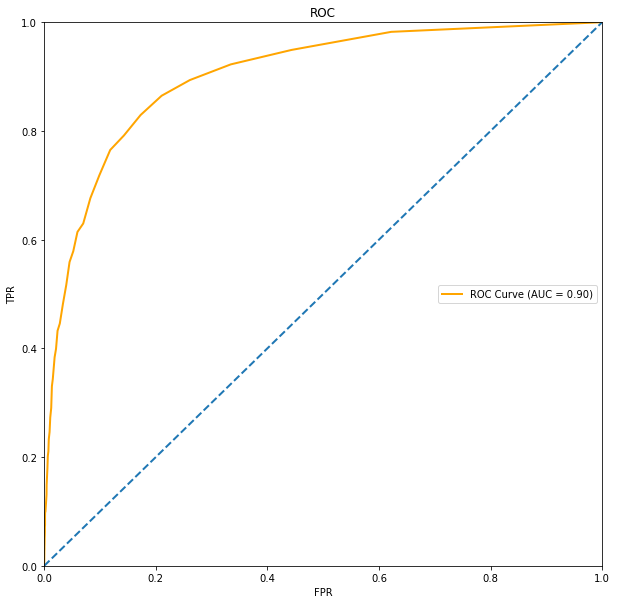

In [ ]:
# plotting ROC curve

from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred = [x[1] for x in randomforest.predict_proba(X_test)]
#print(y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (10, 10))
lw = 2
plt.plot(fpr, tpr, color='orange',lw=lw, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend(loc="right")
plt.show()

Text(0.5, 1.0, '2-Class Precision-Recall curve: AP=0.39')

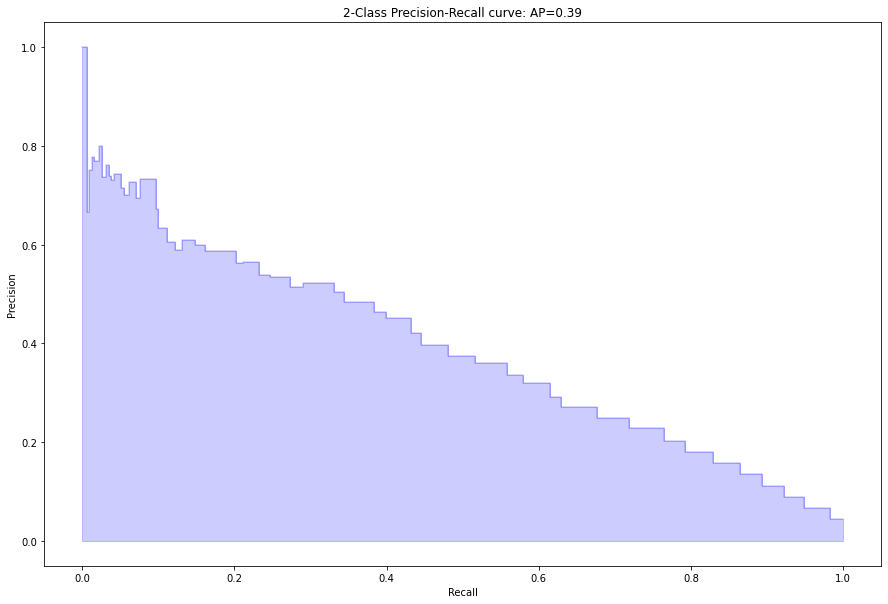

In [ ]:
# Precision vs Recall curve

from sklearn.metrics import average_precision_score, precision_recall_curve
from funcsigs import signature

avg_precision = average_precision_score(y_test, y_pred)

precision, recall, _ = precision_recall_curve(y_test, y_pred)

step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.figure(1, figsize = (15, 10))
plt.step(recall, precision, color='b', alpha=0.2,where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('2-Class Precision-Recall curve: AP={0:0.2f}'.format(avg_precision))